# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=1500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([1500, 2])

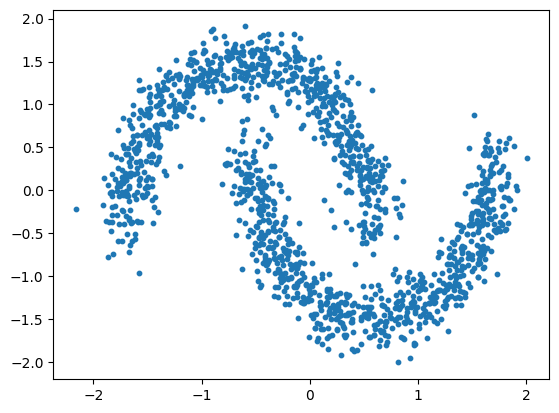

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=20, grid_resolution=5, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 500 | Loss: 1.7514: 100%|██████████| 500/500 [5:22:50<00:00, 38.74s/it]      
Calculating Neighbours: 100%|██████████| 1880/1880 [00:00<00:00, 17370.55it/s]


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

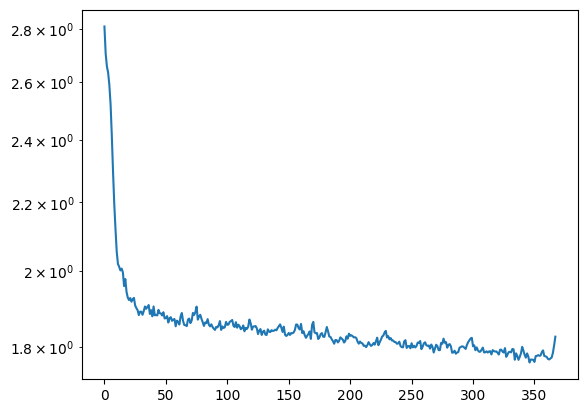

In [ ]:
plt.plot(LAM.loss_history)
plt.yscale('log')

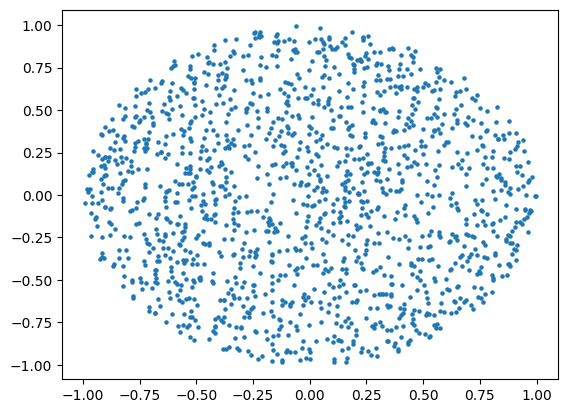

In [ ]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [ ]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 1300,  216, 1439,  962, 1048, 1441, 1449,  883, 1189,  616,
         1083,  791,  217,  963, 1465,  425, 1095, 1499,  888])],
 [array([0.        , 0.03391608, 0.03557461, 0.03651303, 0.04371322,
         0.05877838, 0.06536234, 0.0666912 , 0.06990146, 0.07208747,
         0.072905  , 0.07772449, 0.0780877 , 0.07897249, 0.07915599,
         0.08179721, 0.0846874 , 0.08597575, 0.08705379, 0.08965041])])

In [ ]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 1300,  216, 1439,  962]),
  array([   2,  833,  548,  815, 1461]),
  array([  5, 255,  39, 423, 320])],
 [array([0.        , 0.03391608, 0.03557461, 0.03651303, 0.04371322]),
  array([0.        , 0.02253794, 0.02628015, 0.03605595, 0.03796308]),
  array([0.        , 0.00533938, 0.00798387, 0.01425216, 0.01551832])])

In [ ]:
# calculate the distance between the points 0 and p
p = 5
dist = LAM.distance(0, p, return_path=False)
print(dist)

[0.25549232]


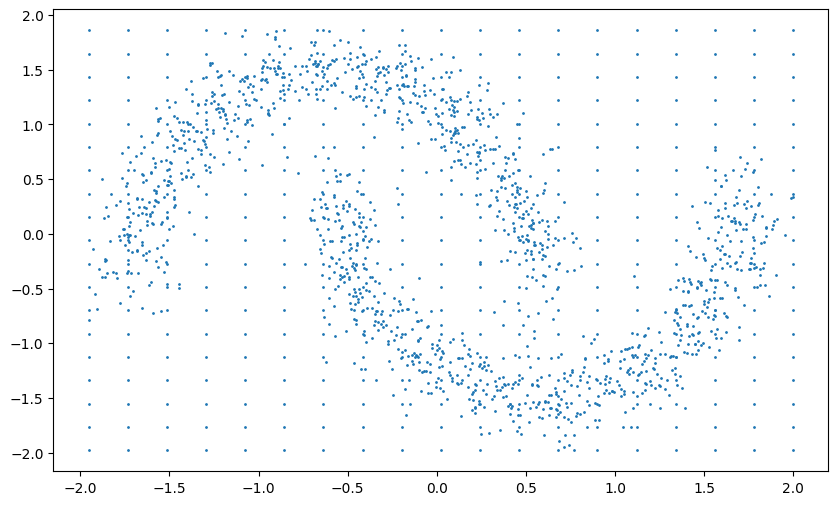

In [ ]:
points = LAM.reference

# plot
fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(points[:, 0], points[:, 1], s=1)

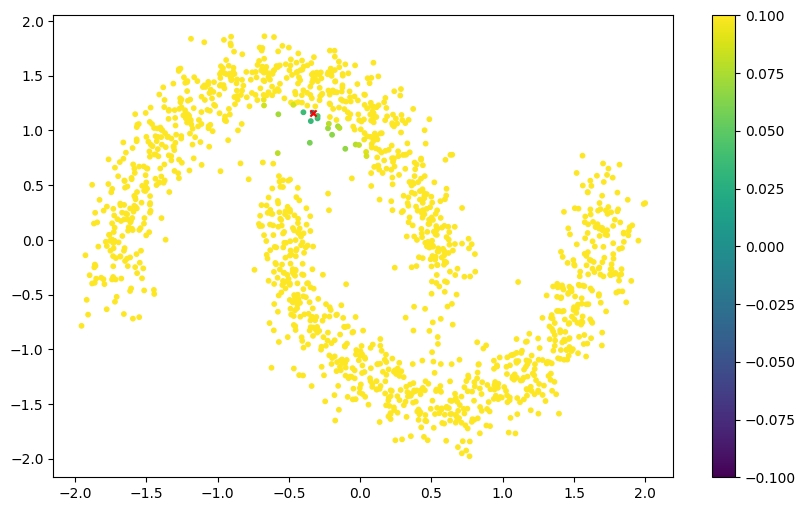

In [ ]:
# calculate the distance to all points from the point 0 and plot

dist = LAM.distance(0)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()

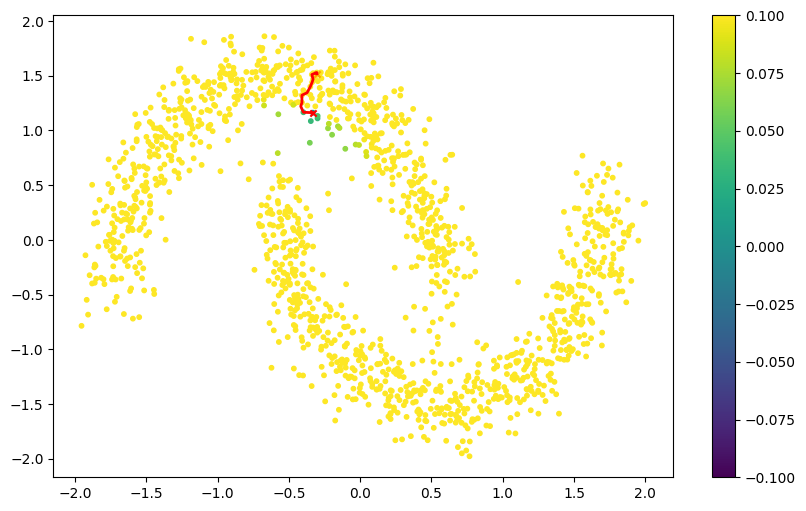

In [ ]:
start_point = 0
end_point = p

_, path = LAM.distance(start_point, end_point, return_path=True)

fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
# plot the path, consider that the entries in path are points
ax.plot(path[:,0], path[:,1], c='r', linewidth=2)
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
ax.scatter(X[p, 0], X[p, 1], c='orange', s=20, marker='x')
plt.colorbar(plot)
plt.show()

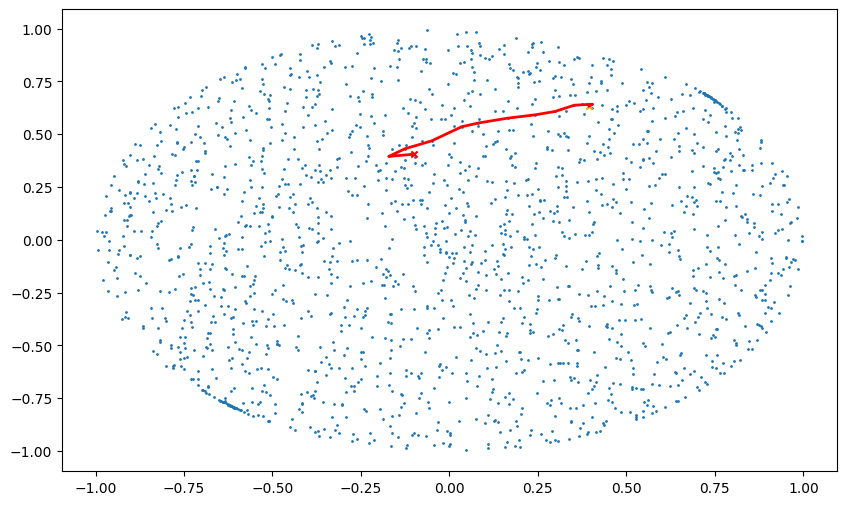

In [ ]:
# plot pushed reference
fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(LAM.reference_pushed[:, 0], LAM.reference_pushed[:, 1], s=1)

# plot the path

path = LAM.flow.transform(path)
ax.plot(path[:, 0], path[:, 1], c='r', linewidth=2)
ax.scatter(LAM.data_pushed[0, 0], LAM.data_pushed[0, 1], c='r', s=20, marker='x')
ax.scatter(LAM.data_pushed[p, 0], LAM.data_pushed[p, 1], c='orange', s=20, marker='x')



In [ ]:
dist

array([0.        , 0.20405523, 0.33062815, ..., 0.30627541, 0.65482645,
       0.08705379])

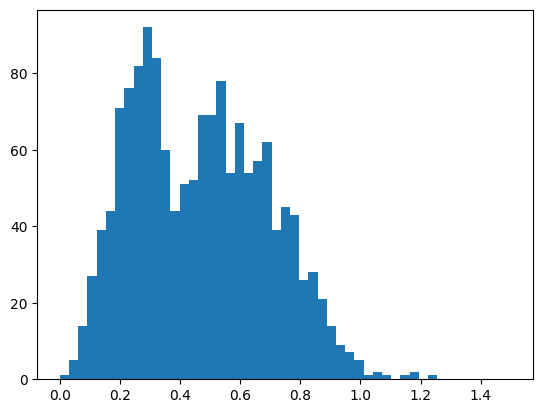

In [ ]:
# histogram of dist
plot = plt.hist(dist, bins=np.linspace(0, 1.5, 50))

In [ ]:
# sum over entries in plot 
np.sum(plot[0])

1497.0

In [ ]:
# find the points with infinite distance

infinite_points = np.where(np.isinf(dist))[0]
infinite_points

array([ 404,  781, 1406])

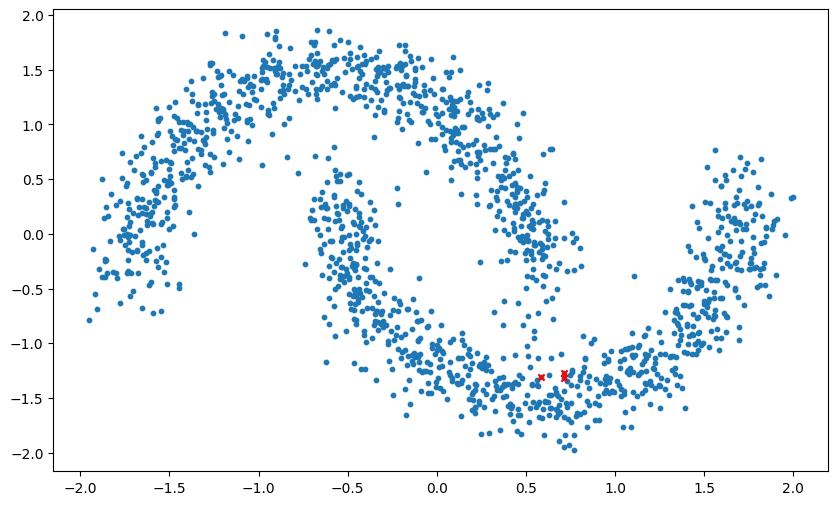

In [ ]:
# plot them

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], s=10)
ax.scatter(X[infinite_points, 0], X[infinite_points, 1], c='r', s=20, marker='x')


In [ ]:
LAM.distance(404)

array([inf, inf, inf, ..., inf, inf, inf])

In [ ]:
LAM.distance_matrix[404]

tensor([inf, inf, inf,  ..., inf, inf, inf])

In [ ]:
#check how many non infitinities are in the 404th row and show the values
print(np.sum(~np.isinf(LAM.distance_matrix[404].detach().numpy())))


21


In [ ]:
LAM.distance_matrix[781][~np.isinf(LAM.distance_matrix[781].detach().numpy())]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])